# Week 1 Challenge Project
---
Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally there may be swelling of the front part of the neck due to goitre. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little iodine in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition Hashimoto's thyroiditis. Less common causes include: previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, or previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with blood tests measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

Worldwide about one billion people are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in 0.3–0.4% of people.

And that is why we iodize salt.

![alt text](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/39/ds00181_-ds00344_-ds00353_-ds00491_-ds00492_-ds00567_-ds00660_-my00709_im01872_thyroid_gif.jpg)



Background: Doctors all around the world need our help to predict whether a patient has hypothyroid disease. We have already overspent our budget to collect such complete data on about 30 attributes for 2800 patients--a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine which attributes are the most meaningful to the predictive models, and cut out the rest that don't contribute much. 

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, it will optimize future data collection by deciding what needs to be collected, and what doesn't.

## Loading the data

Let's read the data into a Pandas dataframe and look at the first 20 records.

In [98]:
import pandas as pd

url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/ChallengeProjects/Week1/allhypo.train.data.csv"
dataset=pd.read_csv(url) 
dataset.head(10)

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions describe() and info() are your friends

In [99]:
dataset.describe()

,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|2557
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  psych   

Note the data types are all objects--even columns that are obviously numeric like Age.


## Data cleaning

To start, let's make all the numerical columns contain the correct type of values and change the data type of those columns to numeric. Let's also replace all those question marks with the median of the respective column.

Hint: To make it easier, first try converting all the "?" to NaN.

In [101]:
import numpy as np

dataset = dataset.replace(to_replace='?', value=float("NaN"))
numeric_columns = ['Age', 'TSH', 'T3', 'TT4', 'T4u', 'FTI']
categorical_columns = []
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)

medians = dataset[numeric_columns].median()
# print(medians)
dataset = dataset.replace(to_replace=np.nan, value=medians)
dataset.head(10)


,Age,Sex,On thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4u,FTI measured,FTI,TBG measured,TBG,referral source,class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.98,f,107.0,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.98,f,107.0,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,t,183.0,t,1.30,t,141.0,f,NaN,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,t,72.0,t,0.92,t,78.0,f,NaN,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,80.0,t,0.70,t,115.0,f,NaN,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,123.0,t,0.93,t,132.0,f,NaN,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,83.0,t,0.89,t,93.0,f,NaN,SVI,negative.|2534


Hmm, still looks like the TBG columns are unfilled, implying they were empty to begin with. Let's get rid of these columns, then (and make sure to get rid of it in your list of categorical/numeric columns, too!)

In [102]:
## YOUR CODE HERE

dataset=dataset.drop('TBG', axis=1)

All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [103]:
dataset[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2800 non-null   float64
 1   TSH     2800 non-null   float64
 2   T3      2800 non-null   float64
 3   TT4     2800 non-null   float64
 4   T4u     2800 non-null   float64
 5   FTI     2800 non-null   float64
dtypes: float64(6)
memory usage: 131.4 KB


Perfect!  Now let's see what's going on with the "class" column.... According to the note the data collectors included with this data, the ".|####" refers to a patient number, and is not necessarily relevant for our purposes here.  Let's turn the "class" column into a useful multi-class label.

In [104]:
## YOUR CODE HERE

for i, diagnosis in enumerate(dataset['class']):
  ndiagnosis = diagnosis.split('.')[0]
  dataset.at[i,'class'] = ndiagnosis

Let's run the describe() function on just the "class" column.

In [105]:
dataset['class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: class, dtype: object

It looks like there are actually 4 unique classification variables! Thank goodness we didn't assume it was binary.

Display all the unique values in the class column.

In [106]:
dataset['class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

But let's make it binary for the sake of this example anyway. If you finish early later on Thursday/Friday, try the multiclass classifier with all 4 values!

In [107]:
# dataset['class'] = dataset['class'].replace({'compensated hypothyroid': 'positive', 'primary hypothyroid': 'positive', 'secondary hypothyroid': 'positive'})

dataset['class'] = dataset['class'].replace({'compensated hypothyroid': 1, 'primary hypothyroid': 1, 'secondary hypothyroid': 1, 'negative': 0})
dataset['class'] = dataset['class'].apply(pd.to_numeric)

Before we move on, let's not forget to run the describe() function on just  your categorical columns, too.
Compare it to the describe() that your numeric columns produce.

In [108]:
dataset['class'].unique()


array([0, 1])

Great! Let's see if there's any other records we have to address. count() is a nice way to check if we have any other missing values.

In [109]:
dataset.count()

Age                          2800
Sex                          2690
On thyroxine                 2800
query on thyroxine           2800
on antithyroid medication    2800
sick                         2800
pregnant                     2800
thyroid surgery              2800
I131 treatment               2800
query hypothyroid            2800
query hyperthyroid           2800
lithium                      2800
goitre                       2800
tumor                        2800
psych                        2800
TSH measured                 2800
TSH                          2800
T3 measured                  2800
T3                           2800
TT4 measured                 2800
TT4                          2800
T4U measured                 2800
T4u                          2800
FTI measured                 2800
FTI                          2800
TBG measured                 2800
referral source              2800
class                        2800
dtype: int64

There seems to be quite a few rows with missing data. There are techniques you can use to try to handle this situation (and some models in sklearn can handle NaN values without problem). But let's just remove those rows for now. When working on groups, you're more than welcome to choose your own method of dealing with the missing data.

In [110]:
## YOUR CODE HERE

dataset=dataset[(dataset['Sex'] == 'F') | (dataset['Sex'] == 'M')]

Ooof! We just cut out about 30% of our data set! You probably won't want to throw out this data for your project, but let's keep going now that we have a clean dataset and do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

As the name suggests, [pandas.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) will compute pairwise correlation of (numerical) columns, excluding NA/null values. Notice that in this case, since we've converted 'class' to a number (0 or 1) we can see how correlated different features are with the class label!

Check the correlation

In [111]:
## YOUR CODE HERE

dataset.corr()

,Age,TSH,T3,TT4,T4u,FTI,class
Age,1.000000,-0.033569,-0.224286,-0.050343,-0.155124,0.040092,-0.008215
TSH,-0.033569,1.000000,-0.155681,-0.259671,0.066218,-0.295188,0.441618
T3,-0.224286,-0.155681,1.000000,0.514505,0.424036,0.312070,-0.167724
TT4,-0.050343,-0.259671,0.514505,1.000000,0.431904,0.781832,-0.268986
T4u,-0.155124,0.066218,0.424036,0.431904,1.000000,-0.167147,0.031880
FTI,0.040092,-0.295188,0.312070,0.781832,-0.167147,1.000000,-0.292745
class,-0.008215,0.441618,-0.167724,-0.268986,0.031880,-0.292745,1.000000


Convert the class feature to numeric so we can also see the correlations it has with the numeric features, and check the correlation again.

In [112]:
## YOUR CODE HERE

# dataset['class'] = dataset['class'].replace(to_replace=('negative', 'positive'), value=(0,1))
# dataset.corr()

Let's do some further visual analysis using a new module called seaborn. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/

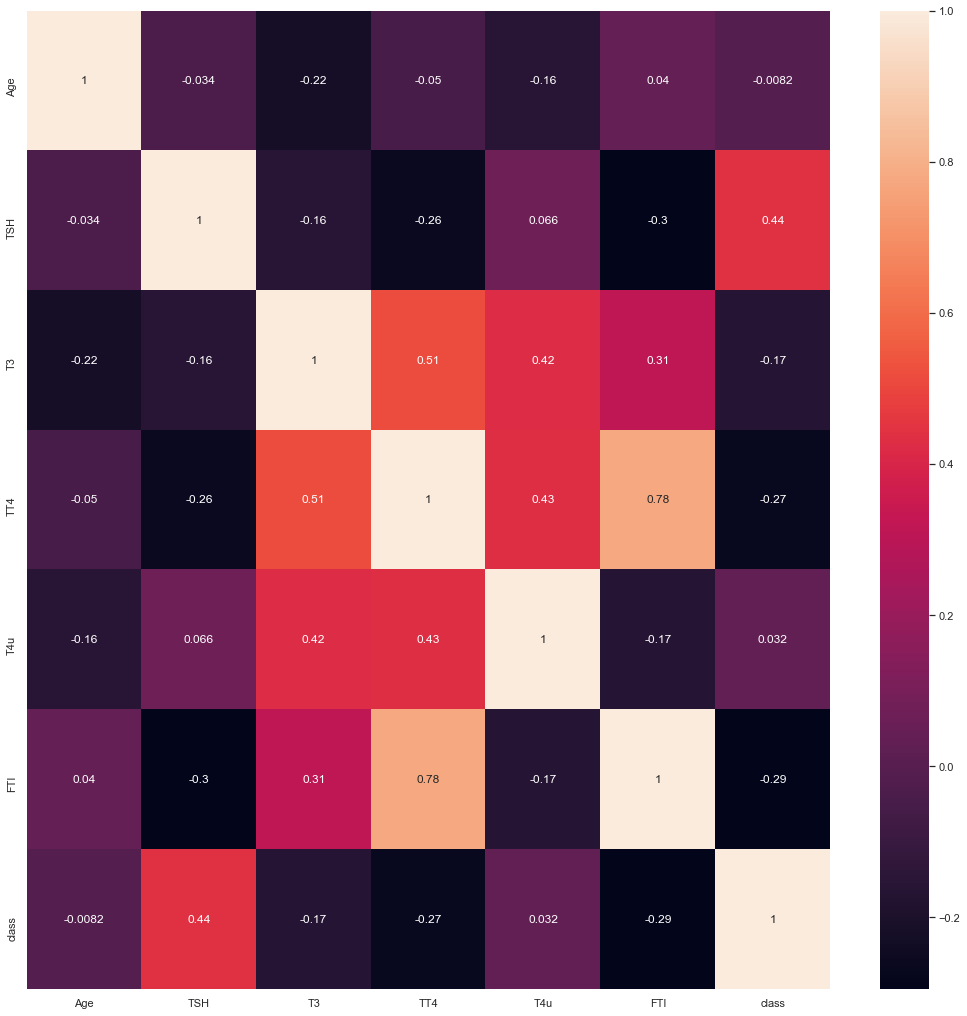

In [115]:
import seaborn as sns

sns.set(rc={'figure.figsize':(18, 18)}) # bigger figures
sns.heatmap(dataset.corr(), annot = True) # creating a heatmap of all variables in the data set
#More info on seaborn.heatmap(...) here: https://seaborn.pydata.org/generated/seaborn.heatmap.html

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, select Age and Sex as our explanatory features (and class as the target feature, obviously).

In [ ]:
dataset.describe()

Now let's take a look at our categorical columns!

In [148]:
## YOUR CODE HERE

# del numerical_columns
# numeric_columns.append('class')

categorical_columns=[]
def generate_categorical_columns():
    categorical_columns = []
    for i in dataset.columns:
        if i not in numeric_columns:
            categorical_columns.append(i)
    print(numeric_columns)
    print(categorical_columns)
generate_categorical_columns()

dataset[categorical_columns].describe()
dataset=dataset.drop('TBG measured', axis=1)

Uh oh... we have several features that are non-informative (they only have a single value).  We probably didn't notice this before because there were still '?' values in there, or perhaps when we threw out that 30% of our data we got rid of some variation in these features.  Let's just drop those columns.

In [149]:
## YOUR CODE HERE
print(dataset)

       Age Sex On thyroxine query on thyroxine on antithyroid medication sick  \
0     41.0   F            f                  f                         f    f   
1     23.0   F            f                  f                         f    f   
2     46.0   M            f                  f                         f    f   
3     70.0   F            t                  f                         f    f   
4     70.0   F            f                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
2795  70.0   M            f                  f                         f    f   
2796  73.0   M            f                  t                         f    f   
2797  75.0   M            f                  f                         f    f   
2798  60.0   F            f                  f                         f    f   
2799  81.0   F            f                  f                         f    f   

     pregnant thyroid surge

We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0,1) using a pretty nifty feature: [pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.get_dummies.html).  We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0,1) using a pretty nifty feature: [pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.get_dummies.html).  

In [164]:
## YOUR CODE HERE
# print(dataset.columns)
# print(pd.get_dummies(dataset, drop_first=True).columns)
dataset = pd.get_dummies(dataset, drop_first=True)
print(dataset)


       Age   TSH   T3    TT4   T4u    FTI  class  Sex_M  On thyroxine_t  \
0     41.0  1.30  2.5  125.0  1.14  109.0      0      0               0   
1     23.0  4.10  2.0  102.0  0.98  107.0      0      0               0   
2     46.0  0.98  2.0  109.0  0.91  120.0      0      1               0   
3     70.0  0.16  1.9  175.0  0.98  107.0      0      0               1   
4     70.0  0.72  1.2   61.0  0.87   70.0      0      0               0   
...    ...   ...  ...    ...   ...    ...    ...    ...             ...   
2795  70.0  2.70  2.0  155.0  1.05  148.0      0      1               0   
2796  73.0  1.40  0.7   63.0  0.88   72.0      0      1               0   
2797  75.0  1.40  2.0  147.0  0.80  183.0      0      1               0   
2798  60.0  1.40  2.0  100.0  0.83  121.0      0      0               0   
2799  81.0  1.20  1.5  114.0  0.99  115.0      0      0               0   

      query on thyroxine_t  ...  psych_t  TSH measured_t  T3 measured_t  \
0                       

In [165]:
dataset.corr()

,Age,TSH,T3,TT4,T4u,FTI,class,Sex_M,On thyroxine_t,query on thyroxine_t,...,psych_t,TSH measured_t,T3 measured_t,TT4 measured_t,T4U measured_t,FTI measured_t,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_other
Age,1.000000,-0.033569,-0.224286,-0.050343,-0.155124,0.040092,-0.008215,-0.008038,0.008623,-0.016537,...,-0.083431,0.111736,0.079403,0.068377,0.091018,0.089888,-0.111797,0.043131,0.281573,-0.137151
TSH,-0.033569,1.000000,-0.155681,-0.259671,0.066218,-0.295188,0.441618,-0.033768,0.020958,-0.015309,...,-0.027167,0.050258,0.013704,0.035055,0.021041,0.020712,-0.042112,-0.011083,0.001231,0.035580
T3,-0.224286,-0.155681,1.000000,0.514505,0.424036,0.312070,-0.167724,-0.062823,0.021582,-0.020427,...,0.024389,-0.030957,0.011871,-0.000449,0.012956,0.011774,0.060133,-0.008715,-0.310804,0.161624
TT4,-0.050343,-0.259671,0.514505,1.000000,0.431904,0.781832,-0.268986,-0.160863,0.207856,-0.012693,...,0.012192,0.032138,-0.023489,0.036151,0.061003,0.058793,-0.017691,0.019490,-0.144514,0.060815
T4u,-0.155124,0.066218,0.424036,0.431904,1.000000,-0.167147,0.031880,-0.227742,0.048860,-0.013550,...,-0.019267,0.028984,0.013139,0.023567,0.030199,0.030078,-0.006885,0.015352,-0.194301,0.057507
FTI,0.040092,-0.295188,0.312070,0.781832,-0.167147,1.000000,-0.292745,-0.029656,0.179914,-0.003982,...,0.022377,0.023195,-0.029617,0.028534,0.037355,0.036616,-0.021672,0.002560,-0.031645,0.031559
class,-0.008215,0.441618,-0.167724,-0.268986,0.031880,-0.292745,1.000000,-0.042863,-0.086285,-0.001571,...,-0.022312,0.097649,0.022703,0.059295,0.017943,0.017287,-0.060899,0.008517,0.041389,0.006508
Sex_M,-0.008038,-0.033768,-0.062823,-0.160863,-0.227742,-0.029656,-0.042863,1.000000,-0.088265,0.040912,...,0.114167,0.038770,0.096030,0.074904,0.045724,0.046813,0.154559,-0.012077,0.112454,-0.155142
On thyroxine_t,0.008623,0.020958,0.021582,0.207856,0.048860,0.179914,-0.086285,-0.088265,1.000000,0.002005,...,-0.079169,0.039720,-0.159090,0.012118,0.020688,0.019853,-0.092987,0.015365,-0.192846,0.238603
query on thyroxine_t,-0.016537,-0.015309,-0.020427,-0.012693,-0.013550,-0.003982,-0.001571,0.040912,0.002005,1.000000,...,-0.028131,-0.122152,-0.034004,0.032110,0.031819,0.031620,-0.041122,0.016201,-0.007597,0.035759
